In [72]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
# For Functional API
from tensorflow.keras import models, Input
# To build model
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
# this one later
from tensorflow.keras.models import Model

In [73]:
# Loading Dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [74]:
# Shape of Dataset
print("X_train shape: {}   X_test shape {}".format(X_train.shape, X_test.shape))
print("Y_train shape: {}   Y_test shape {}".format(y_train.shape, y_test.shape))

X_train shape: (50000, 32, 32, 3)   X_test shape (10000, 32, 32, 3)
Y_train shape: (50000, 1)   Y_test shape (10000, 1)


In [75]:
# Creating an Image Data Generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

width_shift = 0.1
height_shift = 0.1
rotation = 15
flip = True
batch_size = 32

datagen = ImageDataGenerator(
    horizontal_flip=flip,
    width_shift_range=width_shift,
    height_shift_range=height_shift,
    rotation_range=rotation
    )

In [76]:
datagen.fit(X_train)

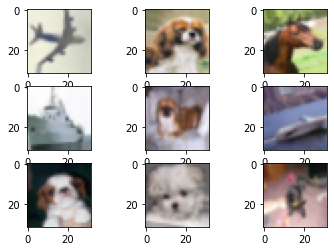

In [77]:
# see example augmentation images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

In [78]:
y_train = y_train.reshape((50000,))
y_test = y_test.reshape((10000,))

In [79]:
# setting class names
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [80]:
class_names[9]

'truck'

In [81]:
# Normalize
X_train, X_test = X_train/255.0, X_test/255.0

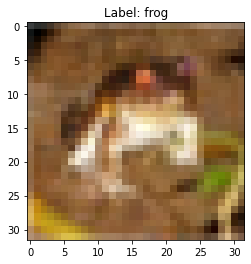

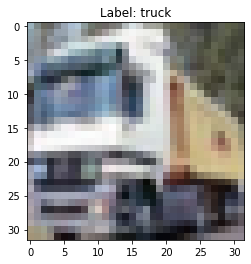

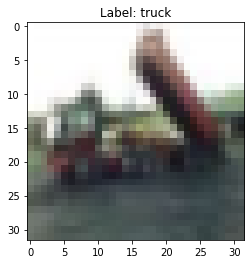

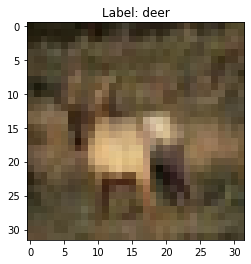

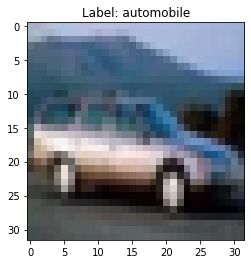

<Figure size 432x288 with 0 Axes>

In [82]:
# Looking at images in training set
# Plotting
N = 5
plt.subplot()
for i in range(0, N):
    plt.imshow(X_train[i])
    
    idx = y_train[i]
    # Just as we saw above
    plt.title("Label: {}".format(class_names[idx]))
    plt.figure()
plt.show()

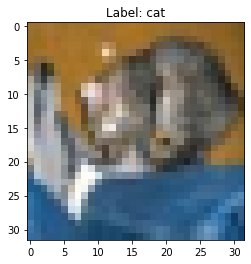

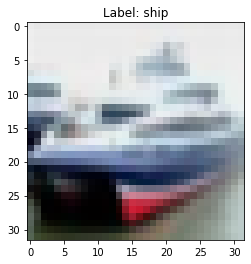

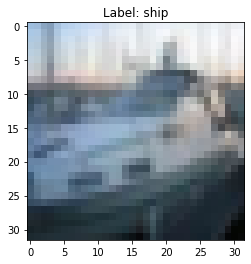

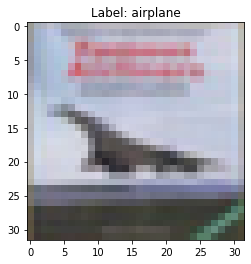

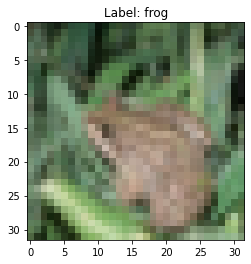

<Figure size 432x288 with 0 Axes>

In [83]:
# Looking at images in test set
N = 5
plt.subplot()
for i in range(0, N):
    plt.imshow(X_test[i])
    
    idx = y_test[i]
    plt.title("Label: {}".format(class_names[idx]))
    plt.figure()
plt.show()

In [84]:
# Build Model using Functional API
def build_model(input_shape, classes):
    # Input layer functional API
    inputs = Input(shape=input_shape)
    
    # Convolution Layer 1
    x = Convolution2D(32, (3, 3), padding="same", activation='relu')(inputs) # Feature maps of same size as inputs
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.2)(x)
    
    # Convolution Layer 2 (same)
    # All else the same
    x = Convolution2D(64, (3, 3), padding="same", activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.2)(x)
    
    # Convolution Layer 3 (same)
    x = Convolution2D(128, (3, 3), padding="same",activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.2)(x)
    
        
    # Convolution Layer 4 (same)
    x = Convolution2D(256, (3, 3), padding="same", activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.2)(x)
    
    
    # Flatten the output into N x D shape which Dense layer expects
    x = Flatten()(x)
    
    # Fully Connected Layer (All same as before)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    
    # Output layer
    outputs = Dense(classes, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    # Return the model
    return model


In [85]:
model = build_model((32, 32, 3), 10)
# call summary on model
model.summary()
# 2 * 2 * 64

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_13 (Batc (None, 16, 16, 64)       

In [86]:
# SAME
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"]) # same as before

In [87]:
batch_size = 128
it = datagen.flow(X_train, y_train, batch_size= batch_size, shuffle=False)
r = model.fit_generator(it, steps_per_epoch = len(X_train) / 128, validation_data=(X_test, y_test) , epochs=20)

Epoch 1/20
391/390 [==============================] - 325s 832ms/step - loss: 1.6990 - accuracy: 0.3858 - val_loss: 3.2981 - val_accuracy: 0.2175
Epoch 2/20
391/390 [==============================] - 362s 925ms/step - loss: 1.3764 - accuracy: 0.5034 - val_loss: 1.3710 - val_accuracy: 0.5139
Epoch 3/20
391/390 [==============================] - 337s 862ms/step - loss: 1.2287 - accuracy: 0.5584 - val_loss: 1.1063 - val_accuracy: 0.6086
Epoch 4/20
391/390 [==============================] - 376s 961ms/step - loss: 1.1215 - accuracy: 0.6012 - val_loss: 0.9346 - val_accuracy: 0.6734
Epoch 5/20
391/390 [==============================] - 358s 916ms/step - loss: 1.0403 - accuracy: 0.6337 - val_loss: 1.1257 - val_accuracy: 0.6264
Epoch 6/20
150/390 [==========>...................] - ETA: 3:23 - loss: 0.9838 - accuracy: 0.6489

KeyboardInterrupt: 

In [ ]:
# Plot loss (SAME CODE)
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
# Plot accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [71]:
score = model.evaluate(X_test, y_test) # 78% accuracy!
# 6% more than benchmark :)

313/313 [==============================] - 14s 45ms/step - loss: 0.7481 - accuracy: 0.7549


In [ ]:
# Making Prediction
pred = model.predict(X_test)

In [61]:
pred = np.argmax(pred, axis=1)

In [62]:
# misclassified will store the index at which misclassification happens
misclassified = []
for i in range(0, len(pred)):
    if(pred[i] != y_test[i]):
        misclassified.append(i)

In [63]:
len(misclassified) # improved !
# previously 3000 wrong

2205

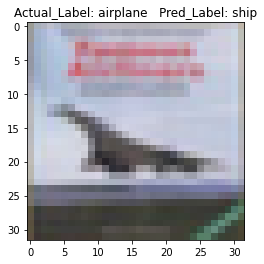

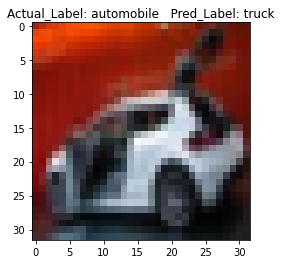

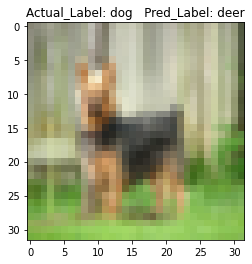

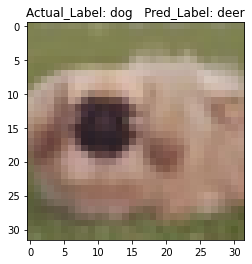

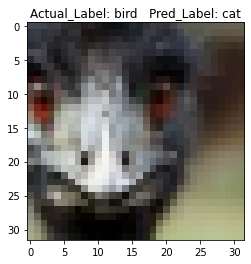

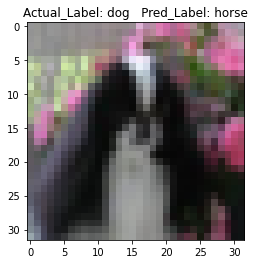

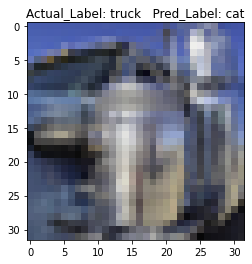

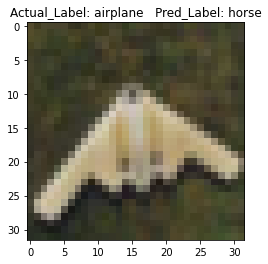

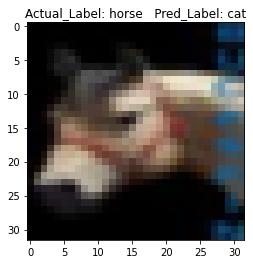

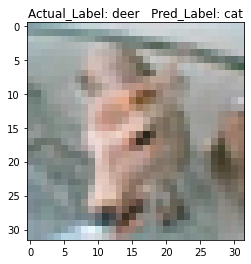

<Figure size 432x288 with 0 Axes>

In [64]:
# Looking at 10 misclassifed images
N = 10
plt.subplot()
for i in range(0, N):
    plt.imshow(X_test[misclassified[i]])
    
    actual_idx = y_test[misclassified[i]]
    pred_idx = pred[misclassified[i]]
    plt.title("Actual_Label: {}   Pred_Label: {}".format(class_names[actual_idx], class_names[pred_idx]))
    plt.figure()
plt.show()